In [232]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [233]:
read = emcee.backends.HDFBackend("simulation.h5")

In [234]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [ ]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
best_log = np.where(log_prob == log_prob.max())
print(log_prob.max())

In [192]:
#parameters of best walker
chain[best_log][1]

array([ 6.00256365e+00, -1.51201875e+00,  7.02804179e+01,  8.56468932e+00,
        8.18285361e+00,  7.35532379e-01,  1.60900154e-02,  7.90764445e+01,
        1.56669640e+00])

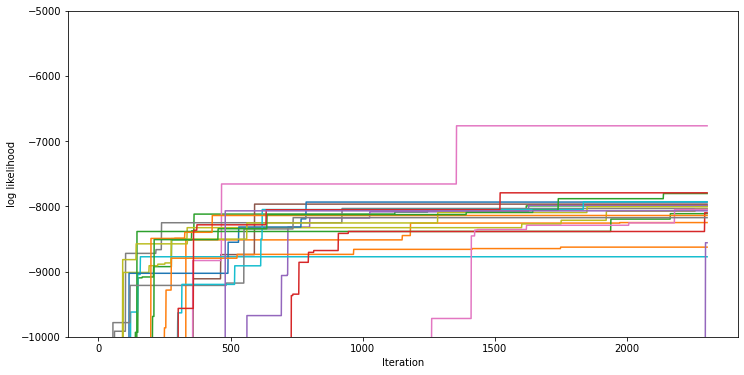

In [193]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-10000, -5000)
    plt.ylabel("log likelihood")
    plt.xlabel("Iteration")

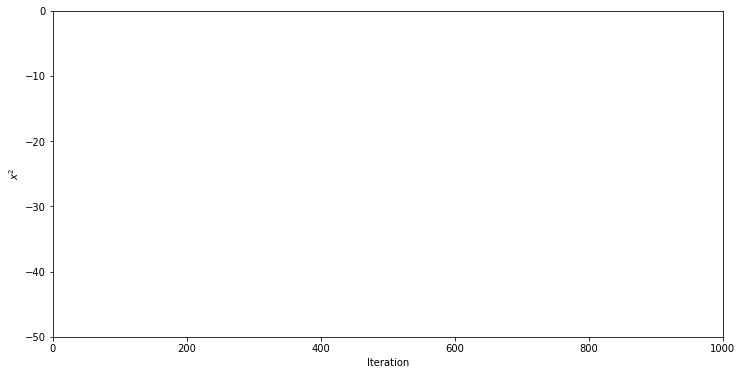

In [142]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [174]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 25


array([11.,  7., 15.,  8., 20.,  6.,  6.,  9.,  9.,  7., 11., 16.,  8.,
       17.,  9.,  6., 24.,  8.,  7., 13., 10.,  5., 10.,  9.,  5.])

[179.5411741  202.20517751 231.82197798 210.32307406 212.51113241
 191.06570199 220.81977236 207.73134733 207.72697573]
flat chain shape: (57625, 9)
flat log prob shape: (57625,)


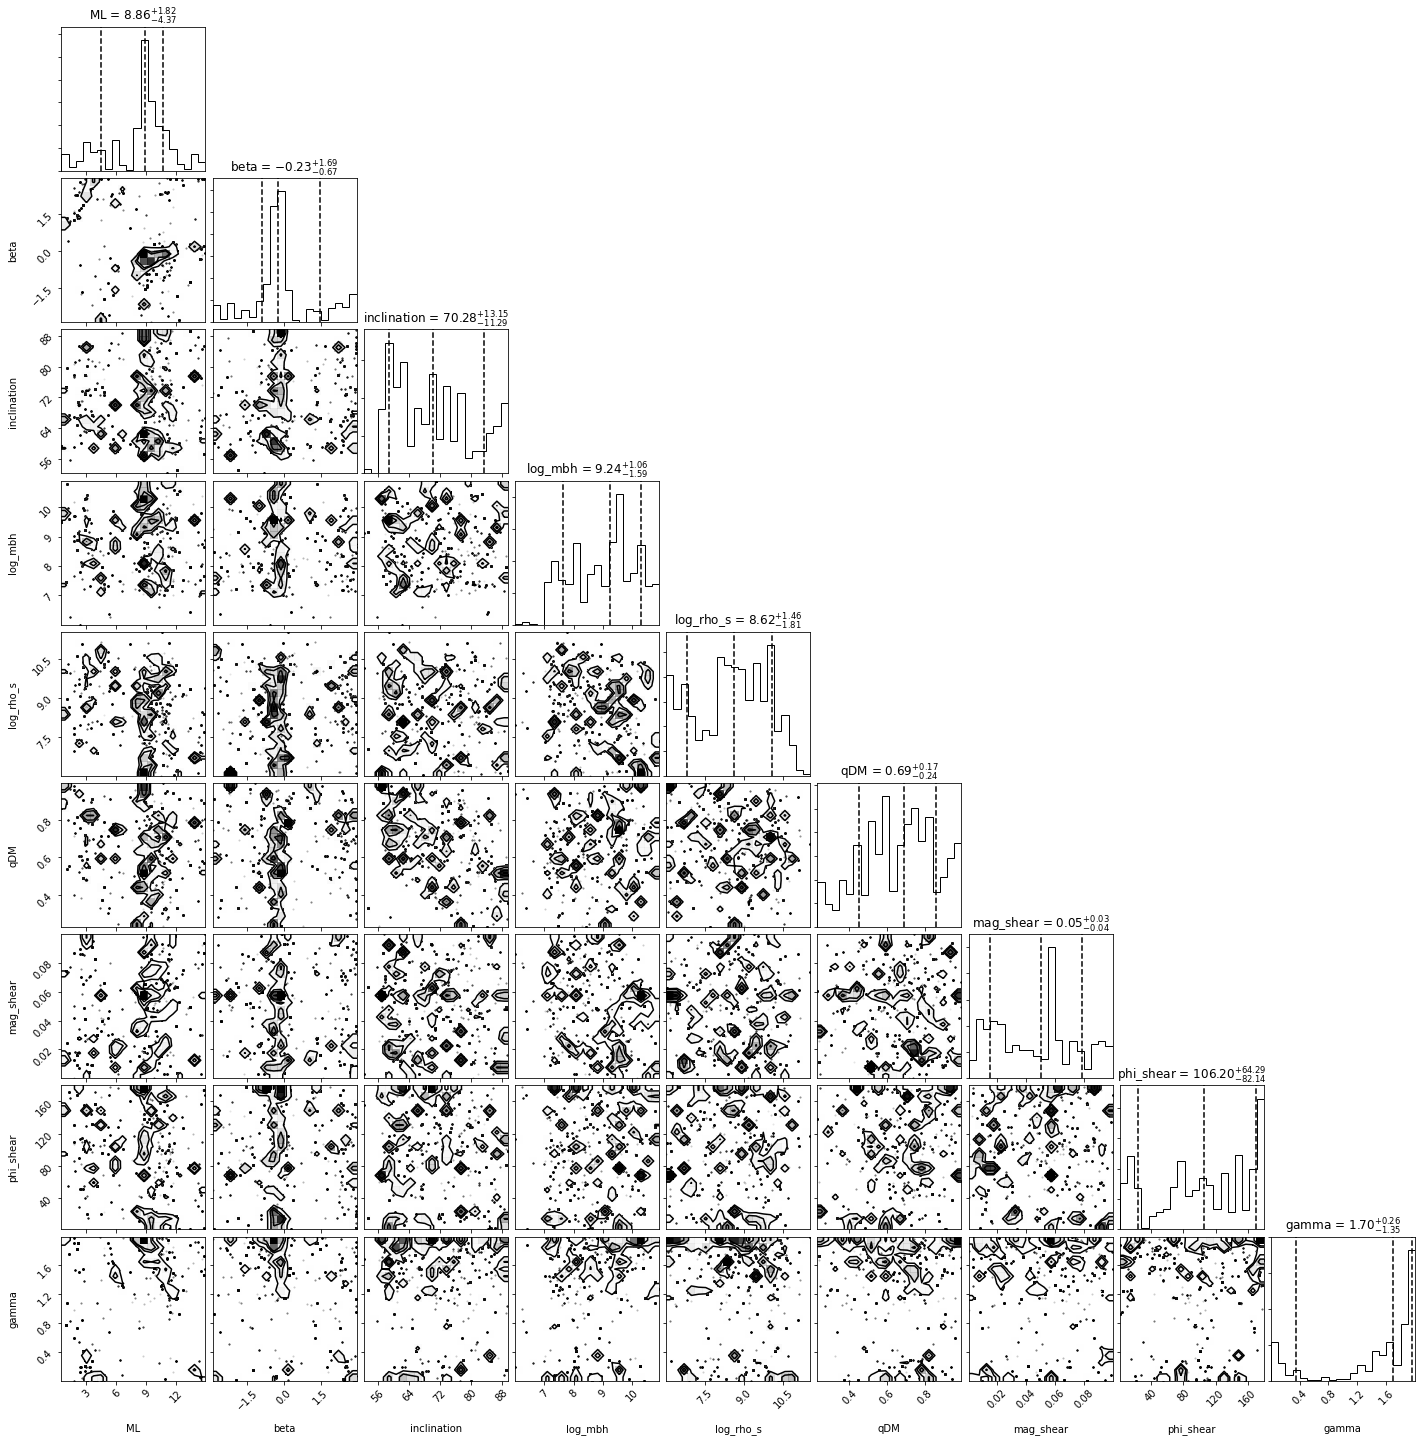

In [194]:
#Corner plots

labels = ["ML", "beta", "inclination", "log_mbh", "log_rho_s", "qDM", "mag_shear", "phi_shear", "gamma"]


tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(flat=True)
log_prob_samples = read.get_log_prob(flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

439 109
flat chain shape: (375, 9)
flat log prob shape: (375,)


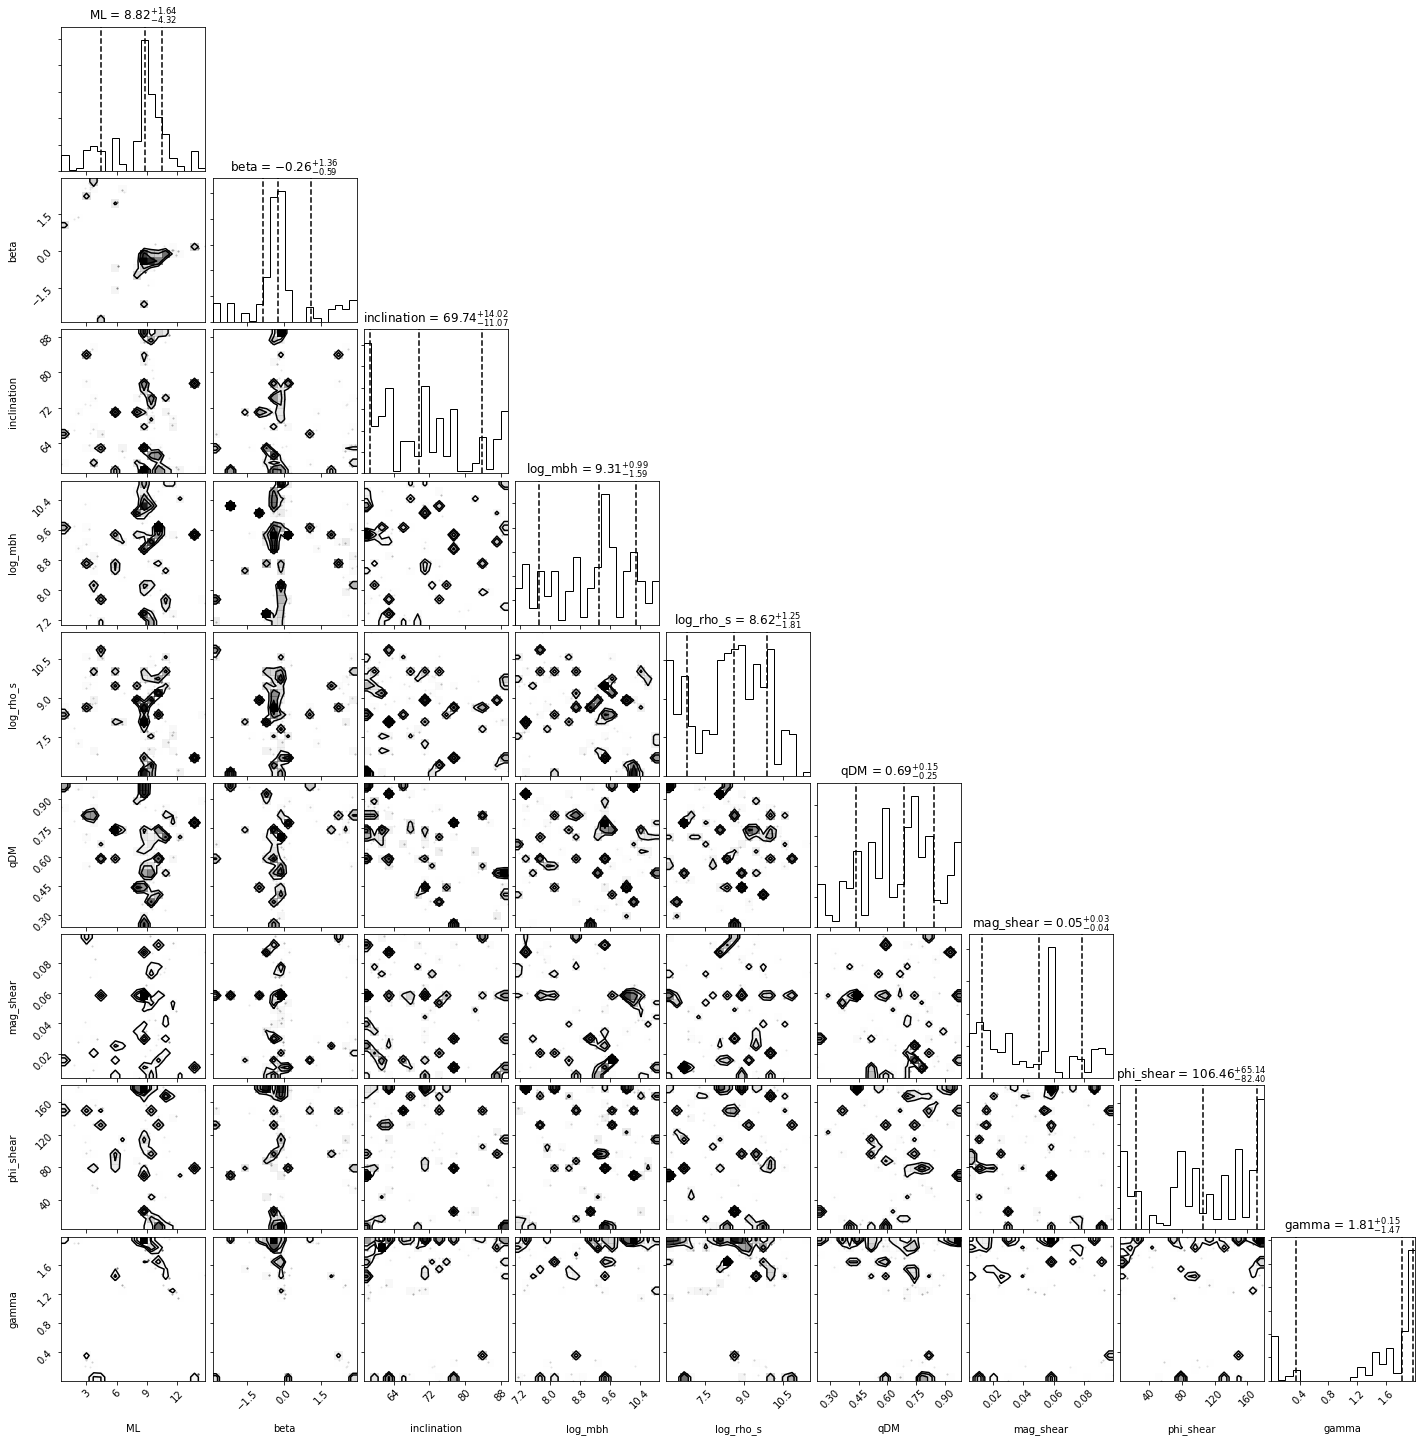

In [176]:
#Corner plots
tau = read.get_autocorr_time(tol=0)
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels =["ML", "beta", "inclination", "log_mbh", "log_rho_s", "qDM", "mag_shear", "phi_shear", "gamma"]


samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [195]:
from IPython.display import display, Math

for i in range(9):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [16]:
tau = read.get_autocorr_time()
tau

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 9 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 98;
tau: [486.31803393 459.28338693 456.9947822  456.8329173  458.93581801
 443.51325637 452.59124965 449.4420879  461.08392454]

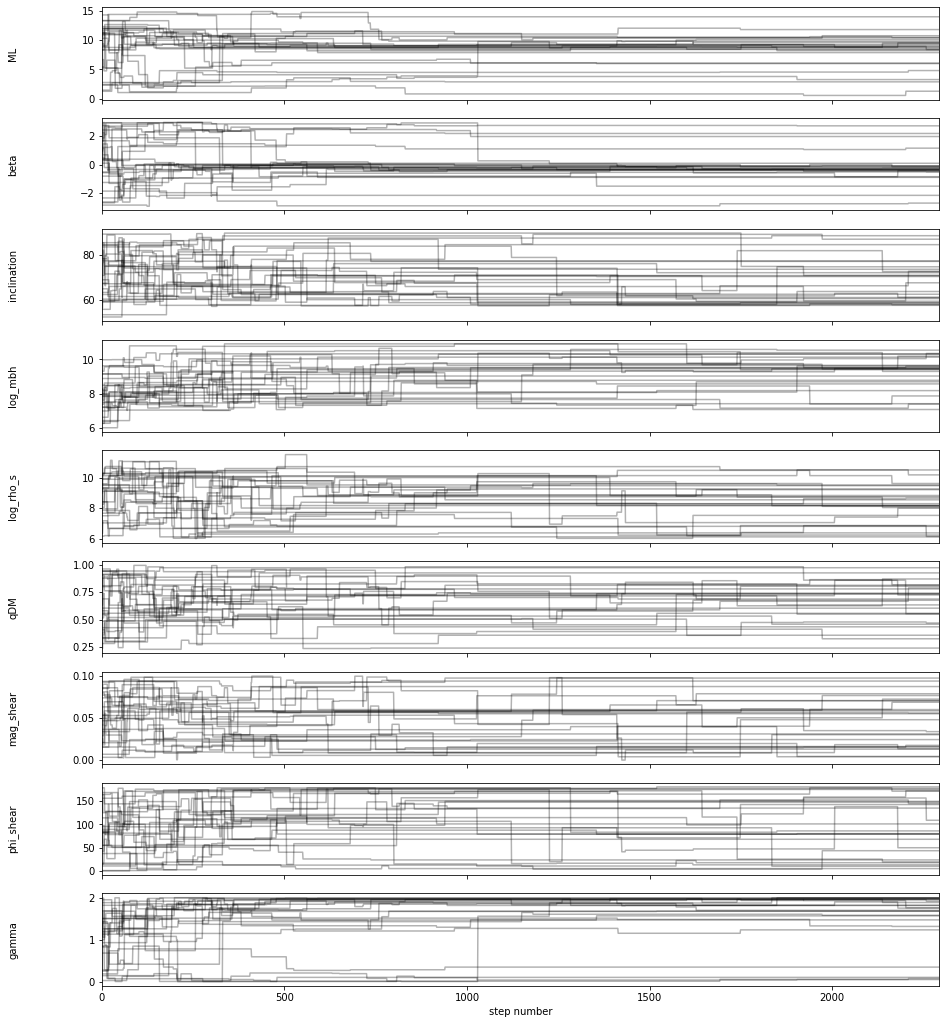

In [185]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [18]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

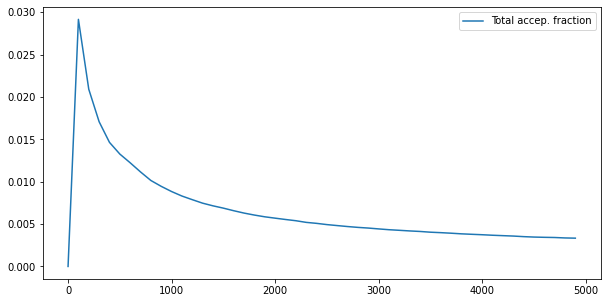

In [19]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

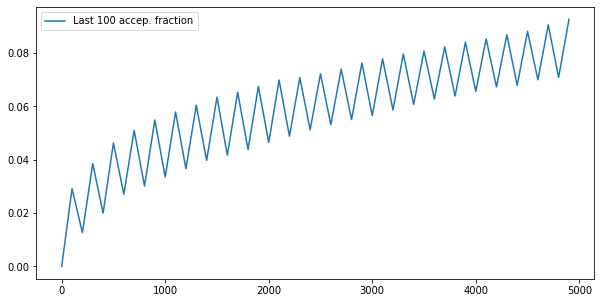

In [21]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
#plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [22]:
#General packages
import numpy as np
from My_Jampy import JAM
import emcee

#MPI
from schwimmbad import MPIPool

#Constants and usefull packages
from astropy.cosmology import Planck15 as cosmo
from astropy.constants import G, M_sun, c
import astropy.units as u

#Autolens Model packages
import autolens as al
import autolens.plot as aplt

#Combined Model package
import CombinedModel

#Useful constants
metre2Mpc = (1*u.m).to(u.Mpc)/u.m           #Constant factor to convert metre to Mpc.
kg2Msun = (1*u.kg/M_sun)*u.solMass/u.kg     #Constant factor to convert kg to Msun

G_Mpc = G*(metre2Mpc)**3/kg2Msun            #Gravitational constant in Mpc³/(Msun s²)
c_Mpc = c*metre2Mpc                         #Speed of light in Mpc/s


#Dataset path
data_folder = "/home/carlos/Documents/GitHub/Master-Degree/Autolens_tests/autolens_workspace/Test_3/Simulation_data/"



In [23]:
def run():
        #Reading MGE inputs
            #attention to units
    surf_lum, sigma_lum, qobs_lum = np.loadtxt("JAM_Input.txt", unpack=True)          #MGE decomposition
    surf_dm, sigma_dm , qobs_dm   = np.loadtxt("SDP81_pseudo-DM.txt", unpack=True)    #DM component
    norm_psf, sigma_psf           = np.loadtxt("MUSE_Psf_model.txt", unpack=True)     #PSF
    xbin, ybin, vrms              = np.loadtxt("vrms_data.txt", unpack=True)          #Vrms data
    
    muse_pixsize = 0.2                            #Muse pixel size [arcsec/px]

    z_lens   = 0.299                                    #Lens redshifth
    z_source = 3.100                                    #Source redshift

    #Angular diameter distances
    D_l = cosmo.angular_diameter_distance(z_lens)                   #Lens              
    D_s = cosmo.angular_diameter_distance(z_source)                 #Source
    D_ls = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)   #Lens to source

    ## Models inicialization

    """
        To inicialize the model, we set some random values for the parameters. But it's only necessary for initialize the model. During the non-linear search, this values will be updated constantly until the best fit.
    """  


       #This quantities are our unknown parameters
    inc       = 75                              #Inclination [deg]
    mbh       = 1e10                            #Mass of black hole [M_sun]
    beta      = np.full_like(surf_lum, 0.3)     #Anisotropy
    ml        = 10                              #Mass to light ratio [M_sun/L_sun]
    mag_shear = 0.01                            #Shear magnitude
    phi_shear = 100.0                             #Shear angle
    rho_s     = 1e10                            #dark matter intensity
    qdm       = np.full_like(qobs_dm, 0.5)      #dark matter axial ratio
    gamma     = 1.0                             #Gamma

    #--------------------------------------------------------------------------------------------------#
    # JAMPY MODEL

    Jam_model = JAM(ybin=ybin, xbin=xbin, inc=inc, distance=D_l.value, mbh=mbh, beta=beta, rms=vrms,
                   normpsf=norm_psf, sigmapsf=sigma_psf*muse_pixsize, pixsize=muse_pixsize)

        #Add Luminosity component
    Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=ml)
        #Add DM component
    Jam_model.DM_component(surf_dm=rho_s * surf_dm, sigma_dm=sigma_dm, qobs_dm=qdm)


    #--------------------------------------------------------------------------------------------------#
    # PYAUTOLENS MODEL

    imaging = al.Imaging.from_fits(
        image_path=f"{data_folder}/arcs_simulation.fits",
        noise_map_path=f"{data_folder}/noise_simulation.fits",
        psf_path=f"{data_folder}/psf_simulation.fits",
        pixel_scales=0.1,
    )

    mask = al.Mask.circular_annular(centre=(0.0, -0.2), inner_radius=1., outer_radius=2.3,
                              pixel_scales=imaging.pixel_scales, shape_2d=imaging.shape_2d) #Create a mask

    masked_image = al.MaskedImaging(imaging=imaging, mask=mask, inversion_uses_border=True) #Masked image

    mass_profile = al.mp.MGE()

        #Components
    mass_profile.MGE_comps(z_l=z_lens, z_s=z_source, 
                       surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum, ml=ml,
                       mbh=mbh, surf_dm =rho_s * surf_dm, sigma_dm=sigma_dm, qobs_dm=qdm)
        #Grid
    mass_profile.MGE_Grid_parameters(masked_image.grid)

    #--------------------------------------------------------------------------------------------------#
    # COMBINED MODEL

        #Just remembering, by default the model does not include dark matter.
    model = CombinedModel.Models(Jampy_model=Jam_model, mass_profile=mass_profile,
                                 masked_imaging=masked_image, quiet=False)

    model.mass_to_light(ml_kind='scalar')               #Setting gradient ML
    model.beta(beta_kind='scalar')                      #Seting vector anisotropy
    model.has_DM(a=True,filename="SDP81_pseudo-DM.txt") #Setting Dark matter component
    
    return model

In [24]:
model = run()

## Best Model

In [25]:
p0 = np.array([ 8.019, -0.443,  72.897, 9.069, 8.607,  0.6741,  0.028,  88.925,1.503])

ParsDic {'ml': 8.019, 'beta': -0.443, 'inc': 72.897, 'log_mbh': 9.069, 'log_rho_s': 8.607, 'qDM': 0.6741, 'mag_shear': 0.028, 'phi_shear': 88.925, 'gamma': 1.503}


/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: divide by zero encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')
/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: invalid value encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')


jam_axi_rms elapsed time sec: 1.07
inc=72.9 beta_z=-0.44 M/L=1 BH=1.17e+09 chi2/DOF=1.18
Total mass MGE: 7.056e+11
Quadva integration
MainProcess 1.3803493976593018


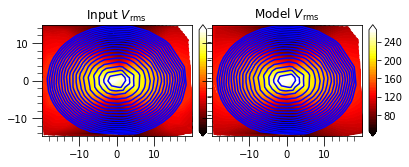

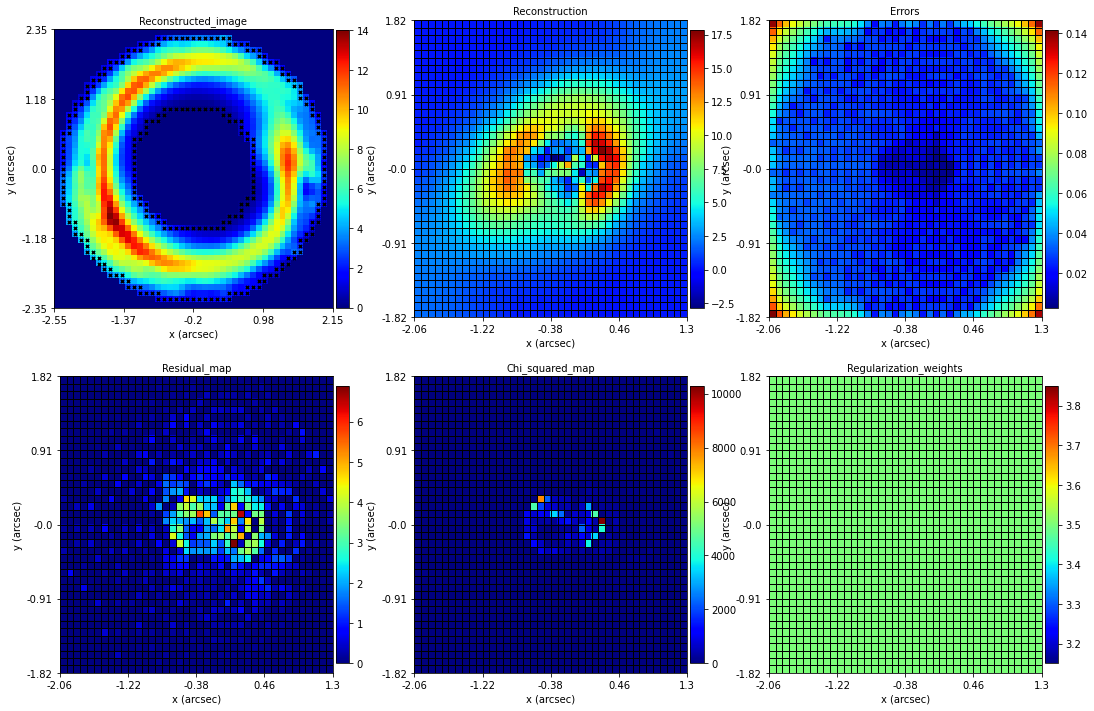

-53342.97167506923

In [26]:
model(p0)

## Best likelihood

In [28]:
p0 = np.array([ 7.76085484e+00, -9.02584402e-01,  6.56818505e+01,  8.55025519e+00,
        7.54774782e+00,  7.95574016e-01,  2.13371595e-02,  9.29765670e+01,
        9.80604095e-01])

ParsDic {'ml': 7.76085484, 'beta': -0.902584402, 'inc': 65.6818505, 'log_mbh': 8.55025519, 'log_rho_s': 7.54774782, 'qDM': 0.795574016, 'mag_shear': 0.0213371595, 'phi_shear': 92.976567, 'gamma': 0.980604095}


/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: divide by zero encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')
/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: invalid value encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')


jam_axi_rms elapsed time sec: 1.00
inc=65.7 beta_z=-0.90 M/L=1 BH=3.55e+08 chi2/DOF=0.998
Total mass MGE: 6.772e+11
Quadva integration
MainProcess 1.2712955474853516


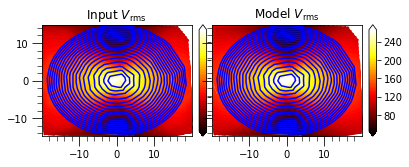

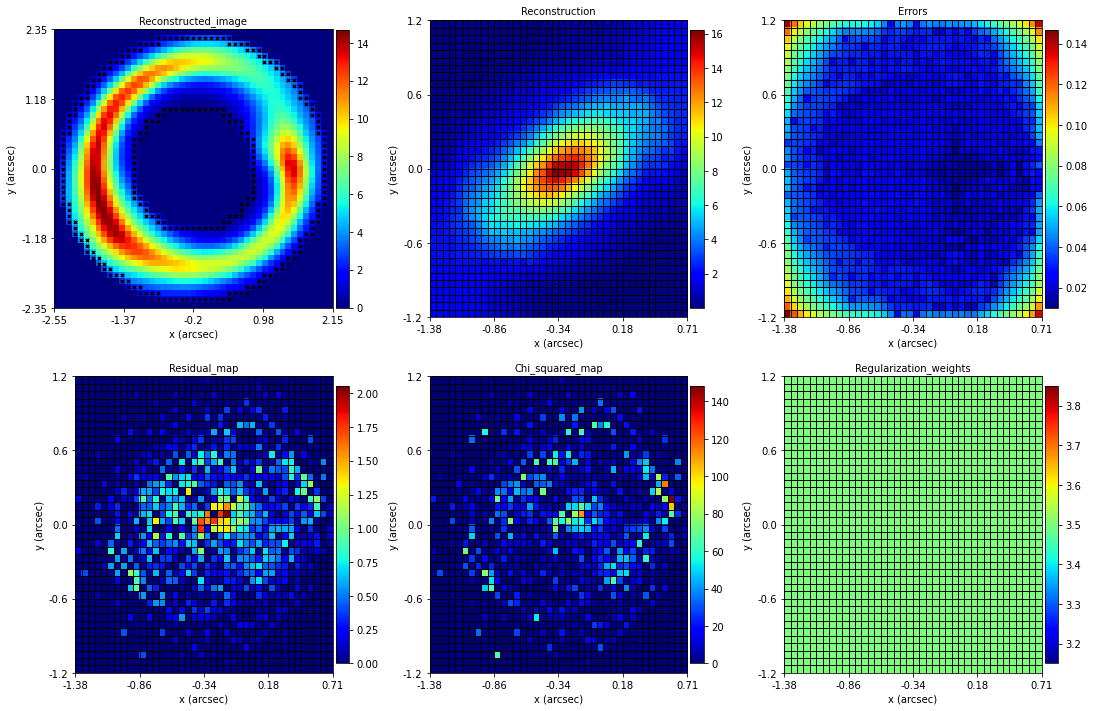

-5986.218603245443

In [29]:
model(p0)